In [67]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split

In [68]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
len(heart_disease)

303

Consulting the sklearn model map and importing Linear SvC

In [70]:
from sklearn.svm import LinearSVC
np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [72]:
clf=LinearSVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

D:\Conda_Pro_\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\Conda_Pro_\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [73]:
   
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

D:\Conda_Pro_\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\Conda_Pro_\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8852459016393442

In [74]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [75]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8524590163934426

Two cents
1. If you have structured data, used ensemble methods
2. If you have unstructured, use deep learning or transfer learning

### Making prediction using  a machine learning model
2 ways to make prediction
* `predict()`
* `predict_proba()`

In [76]:
clf.predict(np.array([1,7,8,3,4])) # this won't work though

D:\Conda_Pro_\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

 Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample

In [77]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [78]:
y_preds=clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [79]:
np.mean(y_preds==y_test)

0.8524590163934426

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

 using `predict_proba()`

In [81]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [82]:
clf.predict_proba(X_test[:5])

array([[0.88, 0.12],
       [0.48, 0.52],
       [0.44, 0.56],
       [0.84, 0.16],
       [0.18, 0.82]])

we use predict_proba() for getting the probabulity of multi classes of classification

the more the n_estimators are, the more time it will take

In [83]:
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8524590163934426

In [84]:
clf = RandomForestClassifier(n_estimators=2000)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8688524590163934

In [85]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7704918032786885

Evaluating a model using a scoring parameter

In [86]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,y,cv=5)
# cv=5 indicates splitting data into validation set into 5 folds

array([0.7704918 , 0.90163934, 0.81967213, 0.76666667, 0.75      ])

In [87]:
cross_val_score(clf,X,y,cv=10)

array([0.87096774, 0.83870968, 0.87096774, 0.83333333, 0.8       ,
       0.83333333, 0.66666667, 0.83333333, 0.76666667, 0.73333333])

In [88]:
cross_val_clf_score=np.mean(cross_val_score(clf,X,y,cv=5))
cross_val_clf_score

0.7984153005464482

### Classification model evaluation metrics
* Accuracy
* Area under curve
* Confusion Matrix
* Classification report

### Accuracy

In [89]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {cross_val_clf_score*100}%")

Heart Disease Classifier Cross-Validated Accuracy: 79.84153005464482%


### Area under curve (AUC/ROC)
Roc curves are a comparison of a model's true positive rate (tpr) versus a 
model's false positive rate (fpr)

* true positve = model predicts 1 and truth is 1
* false positive = model predicts 1 and truth is 0
* true negative = model predicts 0 and truth is 0
* false negative = model predicts 0 and truth is 1

In [90]:
from sklearn.metrics import roc_curve
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.9, 0.1],
       [0.5, 0.5],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.1, 0.9],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [0.7, 0.3]])

In [91]:
y_probs_positive=y_probs[:,1]
# this slicing indicates the data is sliced from all the rows and 2nd column
y_probs_positive

array([0.1, 0.5, 0.6, 0.4, 0.8, 0.9, 0.9, 0. , 0. , 0.3, 0.8, 0.3, 1. ,
       0. , 1. , 1. , 1. , 0.1, 0.1, 0.1, 0.4, 0. , 0.8, 0.7, 0.4, 0.6,
       0.9, 0.6, 0.2, 0.9, 0. , 0. , 0. , 0.4, 0.8, 0.1, 0.3, 0.6, 0.8,
       0.8, 0.5, 0.5, 0.7, 0.4, 0.9, 0.3, 0.7, 1. , 0. , 0. , 0. , 0.1,
       0.9, 0.8, 0.1, 0.2, 0.2, 1. , 0.2, 0. , 0.2])

In [92]:
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)
fpr

array([0.        , 0.        , 0.03448276, 0.06896552, 0.10344828,
       0.13793103, 0.17241379, 0.20689655, 0.24137931, 0.4137931 ,
       0.65517241, 1.        ])

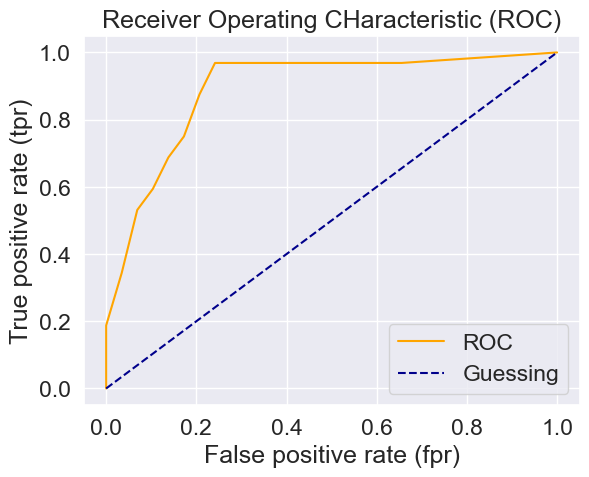

In [93]:
def plot_roc_curve(fpr,tpr):
    '''
    plots fpr to tpr
    '''
    plt.plot(fpr,tpr,color="orange",label='ROC')
    # PLot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.legend()
    plt.title("Receiver Operating CHaracteristic (ROC)")
    plt.show()
plot_roc_curve(fpr,tpr)

In [94]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.890625

ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

### Confusion Matrix

In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [96]:
pd.crosstab(y_test,y_preds,
            rownames=["Actual Values"],
            colnames=["Predicted Values"])

Predicted Values,0,1
Actual Values,,
0,24,5
1,4,28


In [97]:
24+5+4+28

61

In [98]:
len(X_test)

61

* true positve = model predicts 1 and truth is 1
* false positive = model predicts 1 and truth is 0
* true negative = model predicts 0 and truth is 0
* false negative = model predicts 0 and truth is 1

In [99]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn
#how to conda package from jupyter notebook into current environment

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.5.2
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0




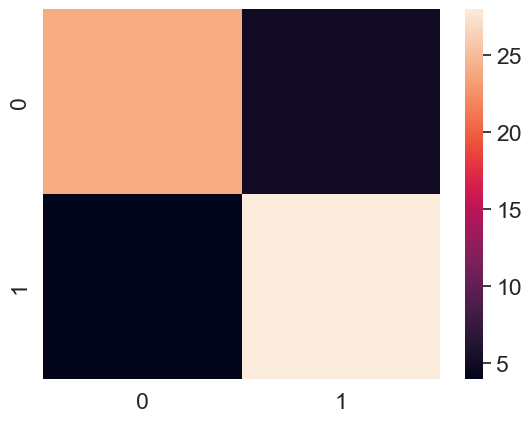

In [101]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test,y_preds)

sns.heatmap(conf_mat);

Confusion matrix tells where the classification model is getting confused

In [102]:
import sklearn
sklearn.__version__
# to check the version of the sklearn from the jupyter notebook

'1.3.0'

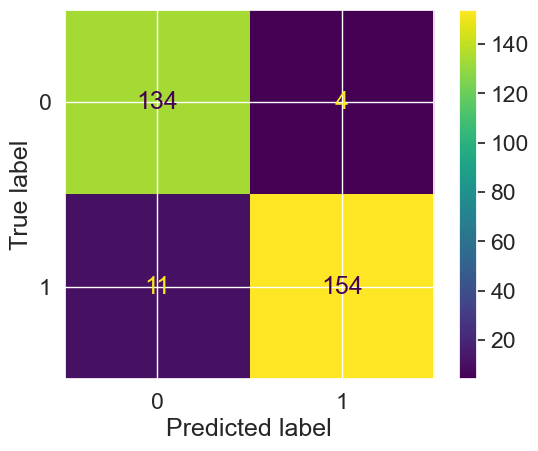

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

# it makes prediction without ready to go

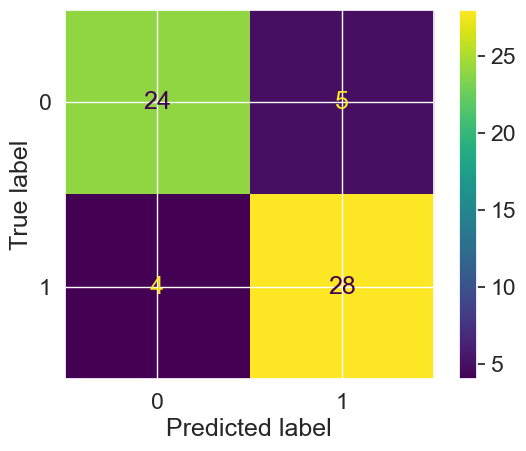

In [104]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

### Classsification Report

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [106]:
# where the precsion and recall become variable
disease_true=np.zeros(10000)
disease_true[0]=1 # only one positive case

disease_preds=np.zeros(10000)
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

D:\Conda_Pro_\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Conda_Pro_\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Conda_Pro_\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### To summarize clasification metrics:
* Accuracy is a good measure to start with if all classes are balanced. (Example, sample amount of samples Which are labeled with zero or one).
* Precision and recall become more important when classes are imbalanced.
* if a false positive predictions are worse than false negatives. Aim for higher precision.
* if a false negative predictions are worse than false positives aim for higher recall.
* F one score is a combination of precision and recall.

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

In [118]:
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
cv_acc= cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [120]:
cv_prec= cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_prec

array([0.80555556, 0.90322581, 0.83870968, 0.78787879, 0.76923077])

# Improving Model


{Parameters} equals to model finding the patterns in data, whereas 
{hyperparameters} are setting some model, you can adjust to potentially improve its ability to find patterns.

 Three ways to adjust Hyper Parameters
 1. By hand
 2. Randomly with RandomSearchCV
 3. Exhaustivlwy with GridSearchCV

By hand

clf.get_params()

We're going to try & adjust
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [134]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [157]:
def evaluate_preds(y_true,y_preds):
    '''Performs evaluation comparison on y_true labels
    vs y_pred labels on a classification'''
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                "precision":round(precision,2),
                "recall":round(recall,2),
                "f1":round(f1,2)}
    print(f"Acc:{accuracy *100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 score:{f1:.2f}")
    return metric_dict
    

In [158]:
np.random.seed(42)
heart_disease_shuffled=heart_disease.sample(frac=1)

X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# Splitting the data into traun, validation and test sets
train_split=round(0.7*len(heart_disease_shuffled))
valid_split=round(train_split+0.15*len(heart_disease_shuffled))

X_train,y_train=X[:train_split],y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:]

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

#Make baseline prediction
y_preds=clf.predict(X_valid)
# Evaluate the classifier on validation set
baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc:82.22%
Precision:0.81
Recall:0.88
F1 score:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [159]:
np.random.seed(42)
# creating a second classifier with different hyperparameters
clf_2=RandomForestClassifier(n_estimators=10)
clf_2.fit(X_train,y_train)
#Make prediction
y_preds_2=clf_2.predict(X_valid)
# Evaluate the classifier on validation set
clf_2_metrics = evaluate_preds(y_valid,y_preds_2)
clf_2_metrics

Acc:82.22%
Precision:0.84
Recall:0.84
F1 score:0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [160]:
np.random.seed(42)
# creating a third classifier with different hyperparameters
clf_3=RandomForestClassifier(n_estimators=10,max_depth=10)
clf_3.fit(X_train,y_train)
#Make prediction
y_preds_3=clf_3.predict(X_valid)
# Evaluate the classifier on validation set
clf_3_metrics = evaluate_preds(y_valid,y_preds_3)
clf_3_metrics

Acc:82.22%
Precision:0.84
Recall:0.84
F1 score:0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

RandomizedSearchCV

In [161]:
from sklearn.model_selection import RandomizedSearchCV
grid={"n_estimators":[10,100,200,500,1000,1200],
      "max_depth":[None,5,10,20,30],
      "max_features":["auto","sqrt"],
      "min_samples_split":[2,4,6],
      "min_samples_leaf":[1,2,4]}
np.random.seed(42)

X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# INstantiate Random Forest Classifier
clf=RandomForestClassifier(n_jobs=1)
#The parameter n_jobs then refers to the number of these jobs that will be executed in parallel.

# Setup RandomizedSearchcv
rs_clf=RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10,
                          cv=5,
                          verbose=2)
# Verbose tell how much value to be printed to the model while training
# n_iter specifies the number of combinations to try randomly
rs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

D:\Conda_Pro_\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Conda_Pro_\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Conda_Pro_\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\Conda_Pro_\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\Conda_Pro_\env\lib\site-packages\sklearn\utils\_param_validation.py"

In [162]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [163]:
# Make predictions using the best paramters
rs_y_preds=rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics =evalauate_preds(y_test,rs_y_preds)

Acc:81.97%
Precision:0.77
Recall:0.86
F1 score:0.81


 GridSearchCV

In [164]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [165]:
grid_2={'n_estimators': [100, 200, 500],
        'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [166]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# INstantiate Random Forest Classifier
clf=RandomForestClassifier(n_jobs=1)
# Setup GridSearchcv
gs_clf=GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                          cv=5,
                          verbose=2)
# Verbose tell how much value to be printed to the model while training
# n_iter specifies the number of combinations to try randomly
gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

D:\Conda_Pro_\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Conda_Pro_\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Conda_Pro_\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\Conda_Pro_\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\Conda_Pro_\env\lib\site-packages\sklearn\utils\_param_validation.py"

In [167]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [168]:
gs_y_preds=gs_clf.predict(X_test)
gs_metrics=evaluate_preds(y_test,gs_y_preds)

Acc:81.97%
Precision:0.77
Recall:0.86
F1 score:0.81


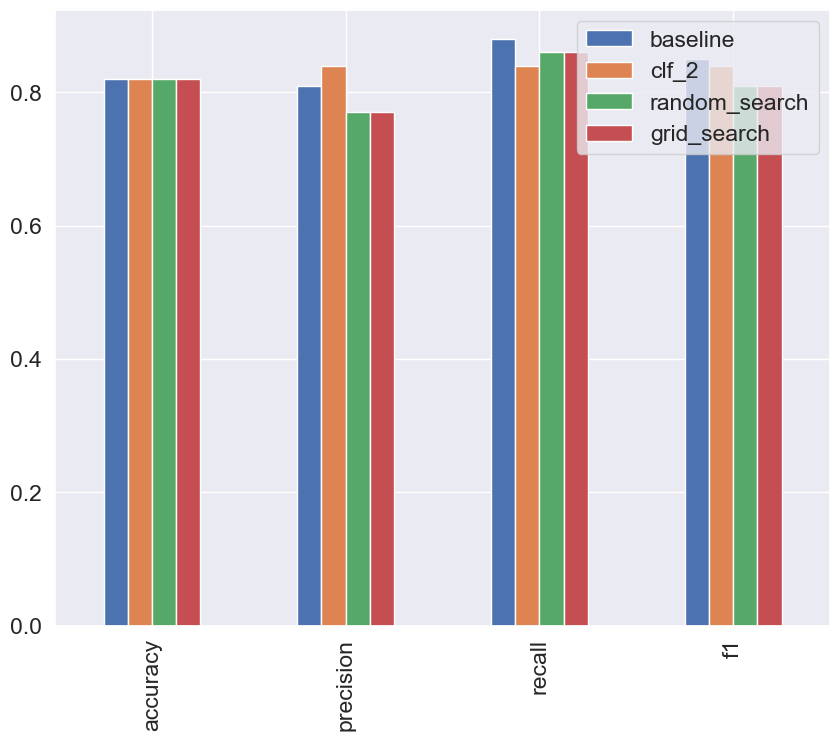

In [171]:
# Let's compare our different model metrics
compare_metrics=pd.DataFrame({"baseline":baseline_metrics,
                            "clf_2":clf_2_metrics,
                            "random_search":rs_metrics,
                            "grid_search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));


 #### Saving and loading trained machine learning model

 There are two ways to save
 1. With pythons `pickle` module
  2. With the `joblib` module

In [173]:
import pickle
# Save an existing model to file
pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl","wb"))
# wb = write binary


In [176]:
# load a saved model
loaded_pickle_model=pickle.load(open("gs_random_forest_model_1.pkl","rb"))
# rb = read binary

In [177]:
# Make some predictions
pickle_y_preds=loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

Acc:81.97%
Precision:0.77
Recall:0.86
F1 score:0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**joblib**

In [178]:
from joblib import dump,load
#save model to file
dump(gs_clf,filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [179]:
loaded_pickle_mode_2=load(filename="gs_random_forest_model_1.joblib")

In [180]:
joblib_y_preds=loaded_pickle_mode_2.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Acc:81.97%
Precision:0.77
Recall:0.86
F1 score:0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}